In [1]:
%matplotlib notebook
import numpy as np
import os
import sys
from matplotlib import pyplot as plt
#from matplotlib import animation
#Path to the scripts shared troughout phases
parent_path=os.path.abspath('..')
path_common =  '/'.join(parent_path.split('/')[:-1])
save_path = os.path.join(parent_path,'Two_ended_chain','Plots','NoDamping')
if(not os.path.exists(save_path)):
    os.makedirs(save_path)

In [3]:
basis_path = os.path.join(parent_path,'Two_ended_chain','no_damping')
one_basis = os.path.join(basis_path,'one_way')
one_way_tr = []
one_way_ge_4 = []
one_way_ge_9 = []
one_way_e_number = []
one_way_t_step = []
for folder in os.listdir(one_basis):
    path_to_saves = os.path.join(one_basis,folder,'Saves')
    one_way_tr.append(np.load(os.path.join(path_to_saves,'losses_tr.npy')))
    one_way_ge_4.append(np.load(os.path.join(path_to_saves,'losses_4_step_ge.npy')))
    one_way_ge_9.append(np.load(os.path.join(path_to_saves,'losses_9_step_ge.npy')))
    one_way_e_number.append(np.load(os.path.join(path_to_saves,'logged_iterations.npy')))
    one_way_t_step.append(np.load(os.path.join(path_to_saves,'logged_time_steps.npy')))  

one_way_tr = np.array(one_way_tr)
one_way_ge_4 = np.array(one_way_ge_4)
one_way_ge_9 = np.array(one_way_ge_9)
one_way_e_number = np.array(one_way_e_number)
one_way_t_step = np.array(one_way_t_step)
"""   
two_basis = os.path.join(basis_path,'two_way','step_error')
two_way_tr = []
two_way_te_7 = []
two_way_ge_4 = []
two_way_ge_11 = []
two_way_e_number = []
two_way_t_step = []
for folder in os.listdir(two_basis):
    path_to_saves = os.path.join(two_basis,folder,'Saves')
    two_way_tr.append(np.load(os.path.join(path_to_saves,'losses_tr.npy')))
    two_way_te_7.append(np.load(os.path.join(path_to_saves,'losses_7_step_ge.npy')))
    two_way_ge_4.append(np.load(os.path.join(path_to_saves,'losses_4_step_ge.npy')))
    two_way_ge_11.append(np.load(os.path.join(path_to_saves,'losses_11_step_ge.npy')))
    two_way_e_number.append(np.load(os.path.join(path_to_saves,'logged_iterations.npy')))
    two_way_t_step.append(np.load(os.path.join(path_to_saves,'logged_time_steps.npy')))  

two_way_tr = np.array(two_way_tr)
two_way_te_7 = np.array(two_way_te_7)
two_way_ge_4 = np.array(two_way_ge_4)
two_way_ge_11 = np.array(two_way_ge_11)
two_way_e_number = np.array(two_way_e_number)
two_way_t_step = np.array(two_way_t_step)"""

"   \ntwo_basis = os.path.join(basis_path,'two_way','step_error')\ntwo_way_tr = []\ntwo_way_te_7 = []\ntwo_way_ge_4 = []\ntwo_way_ge_11 = []\ntwo_way_e_number = []\ntwo_way_t_step = []\nfor folder in os.listdir(two_basis):\n    path_to_saves = os.path.join(two_basis,folder,'Saves')\n    two_way_tr.append(np.load(os.path.join(path_to_saves,'losses_tr.npy')))\n    two_way_te_7.append(np.load(os.path.join(path_to_saves,'losses_7_step_ge.npy')))\n    two_way_ge_4.append(np.load(os.path.join(path_to_saves,'losses_4_step_ge.npy')))\n    two_way_ge_11.append(np.load(os.path.join(path_to_saves,'losses_11_step_ge.npy')))\n    two_way_e_number.append(np.load(os.path.join(path_to_saves,'logged_iterations.npy')))\n    two_way_t_step.append(np.load(os.path.join(path_to_saves,'logged_time_steps.npy')))  \n\ntwo_way_tr = np.array(two_way_tr)\ntwo_way_te_7 = np.array(two_way_te_7)\ntwo_way_ge_4 = np.array(two_way_ge_4)\ntwo_way_ge_11 = np.array(two_way_ge_11)\ntwo_way_e_number = np.array(two_way_e_num

<IPython.core.display.Javascript object>


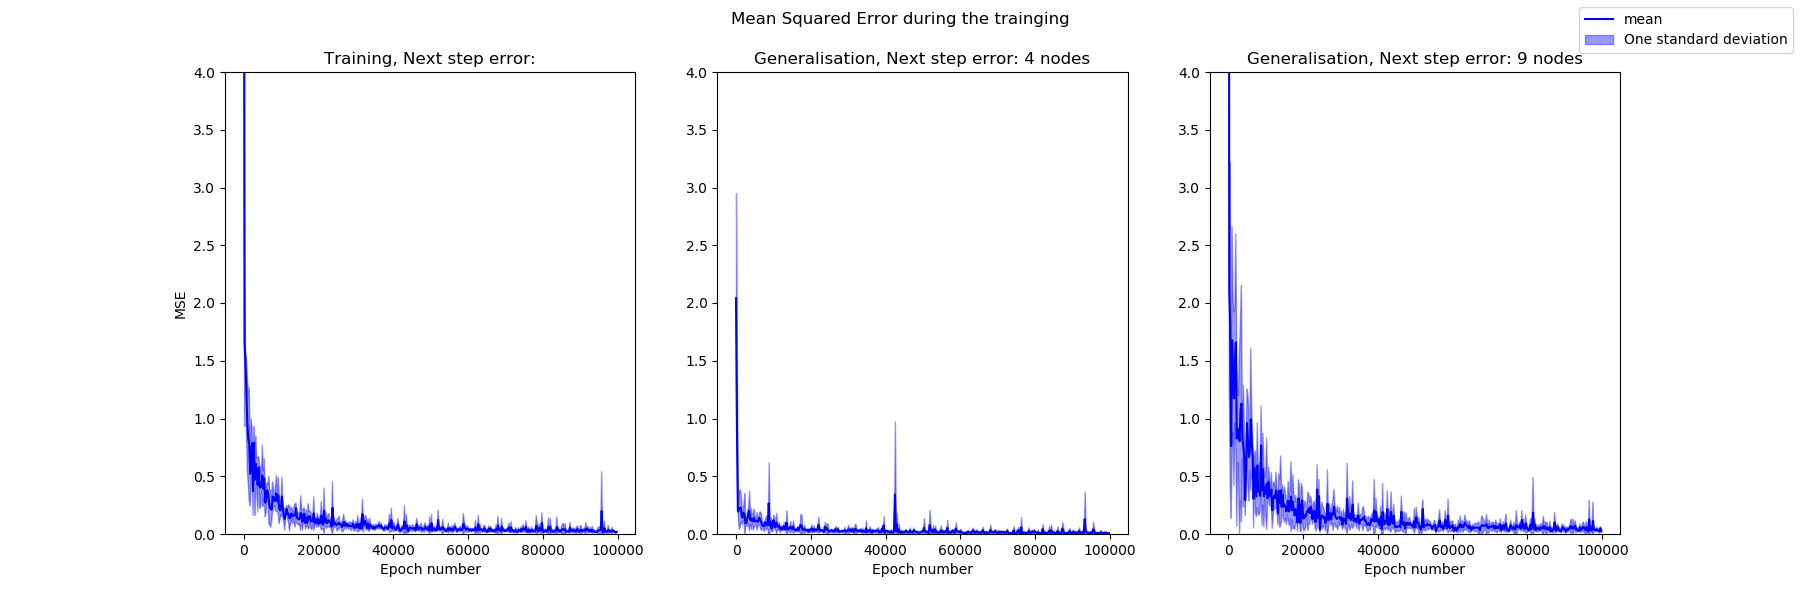

In [15]:
one_way_tr_mean = np.mean(one_way_tr,axis = 0)
one_way_tr_std = np.std(one_way_tr,axis = 0)

plt.close('all')
fig = plt.figure(1, figsize=(18, 6))
fig.clf()
ax = fig.add_subplot(1, 3, 1)
ax.plot(one_way_e_number[0], one_way_tr_mean, "b",label="mean")
plt.fill_between(one_way_e_number[0], one_way_tr_mean-one_way_tr_std, one_way_tr_mean+one_way_tr_std, color = "b",alpha=0.4,label="One standard deviation")

ax.set_title("Training, Next step error:")
ax.set_xlabel("Epoch number")
ax.set_ylabel("MSE")
ax.set_ylim([0,4])

one_way_ge_mean = np.mean(one_way_ge_4,axis = 0)
one_way_ge_std = np.std(one_way_ge_4,axis = 0)

ax1 = fig.add_subplot(1, 3, 2)
ax1.plot(one_way_e_number[0], one_way_ge_mean, "b")#,label="One way edge")
plt.fill_between(one_way_e_number[0], one_way_ge_mean-one_way_ge_std, one_way_ge_mean+one_way_ge_std, color = "b",alpha=0.4)

ax1.set_title("Generalisation, Next step error: 4 nodes")
ax1.set_xlabel("Epoch number")
ax1.set_ylim([0,4])

one_way_ge_mean = np.mean(one_way_ge_9,axis = 0)
one_way_ge_std = np.std(one_way_ge_9,axis = 0)

ax2 = fig.add_subplot(1, 3, 3)
ax2.plot(one_way_e_number[0], one_way_ge_mean, "b")#,label="One way edge")
plt.fill_between(one_way_e_number[0], one_way_ge_mean-one_way_ge_std, one_way_ge_mean+one_way_ge_std, color = "b",alpha=0.4)

ax2.set_title("Generalisation, Next step error: 9 nodes")
ax2.set_xlabel("Epoch number")
ax2.set_ylim([0,4])

fig.legend()
fig.suptitle("Mean Squared Error during the trainging")
plt.show()

#Save figure                  
fig.savefig(os.path.join(save_path,"ConvergencePlots_avg_step.pdf"))

<IPython.core.display.Javascript object>


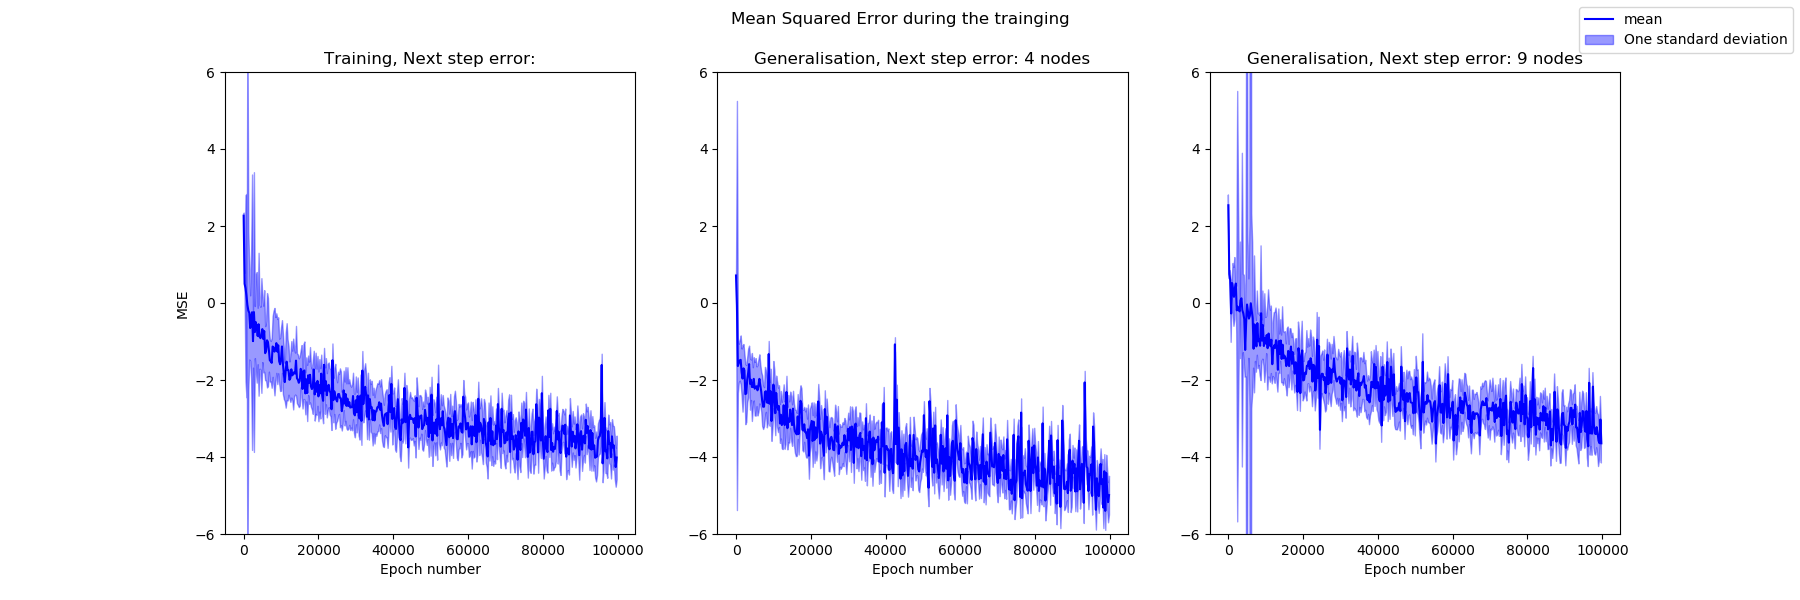

In [14]:
one_way_tr_mean = np.mean(one_way_tr,axis = 0)
one_way_tr_std = np.std(one_way_tr,axis = 0)
y = np.log(one_way_tr_mean)
e = np.log(one_way_tr_std)

plt.close('all')
fig = plt.figure(1, figsize=(18, 6))
fig.clf()
ax = fig.add_subplot(1, 3, 1)
ax.plot(one_way_e_number[0], y, "b",label="mean")#,label="One way edge")
plt.fill_between(one_way_e_number[0], y-0.434*e/y, y+0.434*e/y, color = "b",alpha=0.4,label="One standard deviation")

ax.set_title("Training, Next step error:")
ax.set_xlabel("Epoch number")
ax.set_ylabel("MSE")
ax.set_ylim([-6,6])

one_way_ge_mean = np.mean(one_way_ge_4,axis = 0)
one_way_ge_std = np.std(one_way_ge_4,axis = 0)
y = np.log(one_way_ge_mean)
e = np.log(one_way_ge_std)

ax1 = fig.add_subplot(1, 3, 2)
ax1.plot(one_way_e_number[0], y, "b")#,label="One way edge")
plt.fill_between(one_way_e_number[0], y-0.434*e/y, y+0.434*e/y, color = "b",alpha=0.4)

ax1.set_title("Generalisation, Next step error: 4 nodes")
ax1.set_xlabel("Epoch number")
ax1.set_ylim([-6,6])

one_way_ge_mean = np.mean(one_way_ge_9,axis = 0)
one_way_ge_std = np.std(one_way_ge_9,axis = 0)
y = np.log(one_way_ge_mean)
e = np.log(one_way_ge_std)

ax2 = fig.add_subplot(1, 3, 3)
ax2.plot(one_way_e_number[0], y, "b")#,label="One way edge")
plt.fill_between(one_way_e_number[0], y-0.434*e/y, y+0.434*e/y, color = "b",alpha=0.4)

ax2.set_title("Generalisation, Next step error: 9 nodes")
ax2.set_xlabel("Epoch number")
ax2.set_ylim([-6,6])

fig.legend()
fig.suptitle("Mean Squared Error during the trainging")
plt.show()

#Save figure                  
fig.savefig(os.path.join(save_path,"ConvergencePlots_avg_step_log_scale.pdf"))

<IPython.core.display.Javascript object>


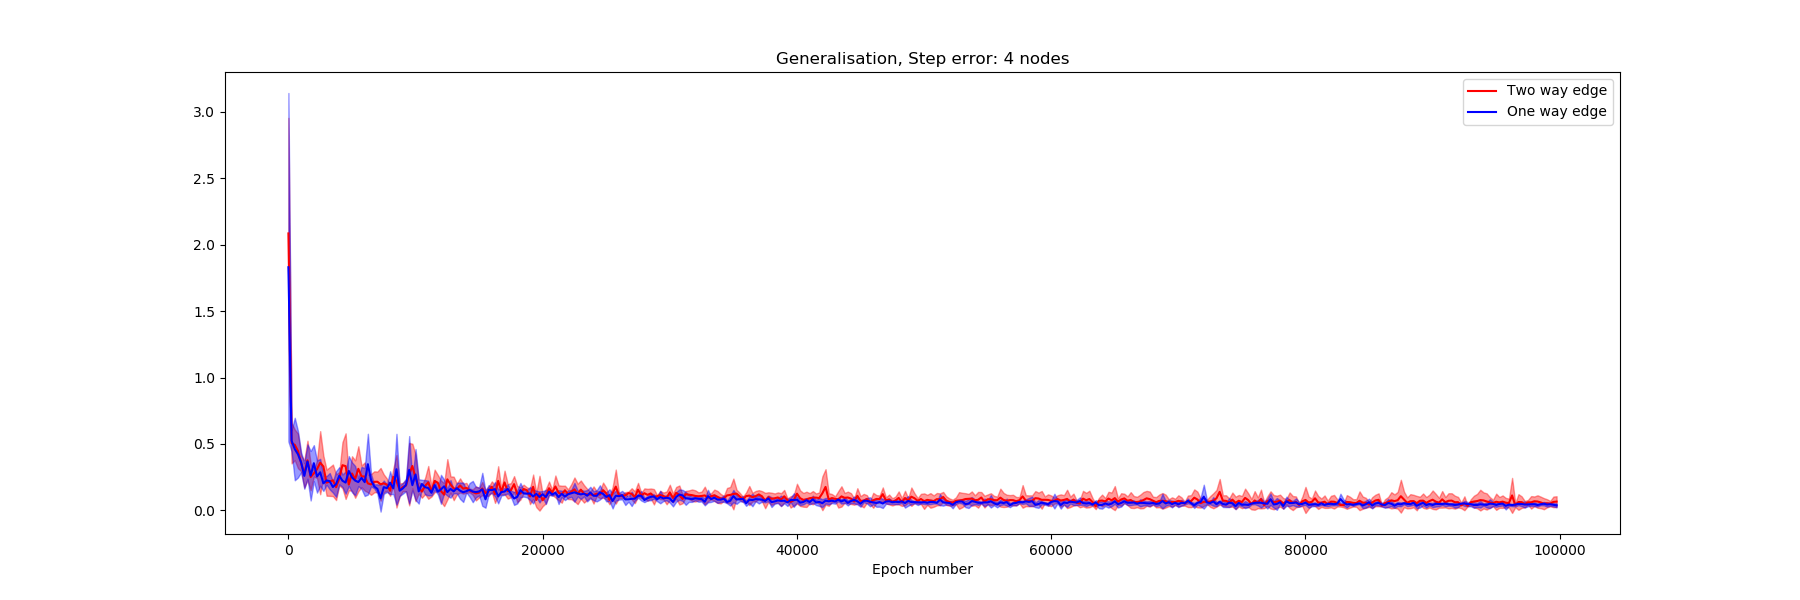

In [15]:
one_way_ge_mean = np.mean(one_way_ge_4,axis = 0)
one_way_ge_std = np.std(one_way_ge_4,axis = 0)
two_way_ge_mean = np.mean(two_way_ge_4,axis = 0)
two_way_ge_std = np.std(two_way_ge_4,axis = 0)

plt.close('all')
fig = plt.figure(1, figsize=(18, 6))
fig.clf()

ax = fig.add_subplot(1, 1, 1)
ax.plot(two_way_e_number[0], two_way_ge_mean, "r",label="Two way edge")
plt.fill_between(two_way_e_number[0], two_way_ge_mean-two_way_ge_std, two_way_ge_mean+two_way_ge_std, color = "r",alpha=0.4)
ax.plot(one_way_e_number[0], one_way_ge_mean, "b",label="One way edge")
plt.fill_between(one_way_e_number[0], one_way_ge_mean-one_way_ge_std, one_way_ge_mean+one_way_ge_std, color = "b",alpha=0.4)

ax.legend()
ax.set_title("Generalisation, Step error: 4 nodes")
ax.set_xlabel("Epoch number")
plt.show()

#Save figure                  
fig.savefig(os.path.join(save_path,"ConvergencePlots_avg_ge_4.pdf"))

<IPython.core.display.Javascript object>


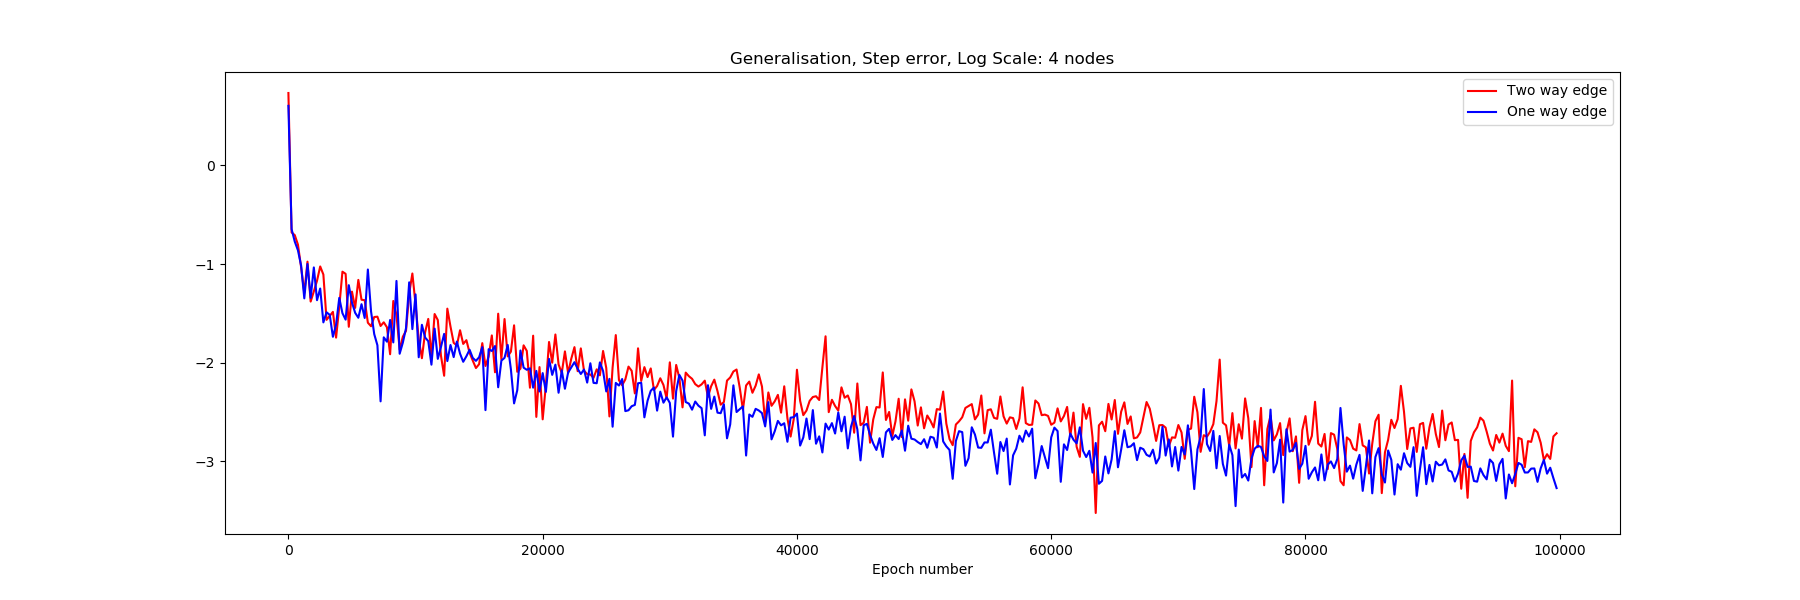

In [16]:
one_way_ge_mean = np.mean(one_way_ge_4,axis = 0)
one_way_ge_std = np.std(one_way_ge_4,axis = 0)
two_way_ge_mean = np.mean(two_way_ge_4,axis = 0)
two_way_ge_std = np.std(two_way_ge_4,axis = 0)

plt.close('all')
fig = plt.figure(1, figsize=(18, 6))
fig.clf()

ax = fig.add_subplot(1, 1, 1)
ax.plot(two_way_e_number[0], np.log(two_way_ge_mean), "r",label="Two way edge")
ax.plot(one_way_e_number[0], np.log(one_way_ge_mean), "b",label="One way edge")
ax.legend()
ax.set_title("Generalisation, Step error, Log Scale: 4 nodes")
ax.set_xlabel("Epoch number")
plt.show()

#Save figure                  
fig.savefig(os.path.join(save_path,"ConvergencePlots_avg_ge_4_log_scale.pdf"))

<IPython.core.display.Javascript object>


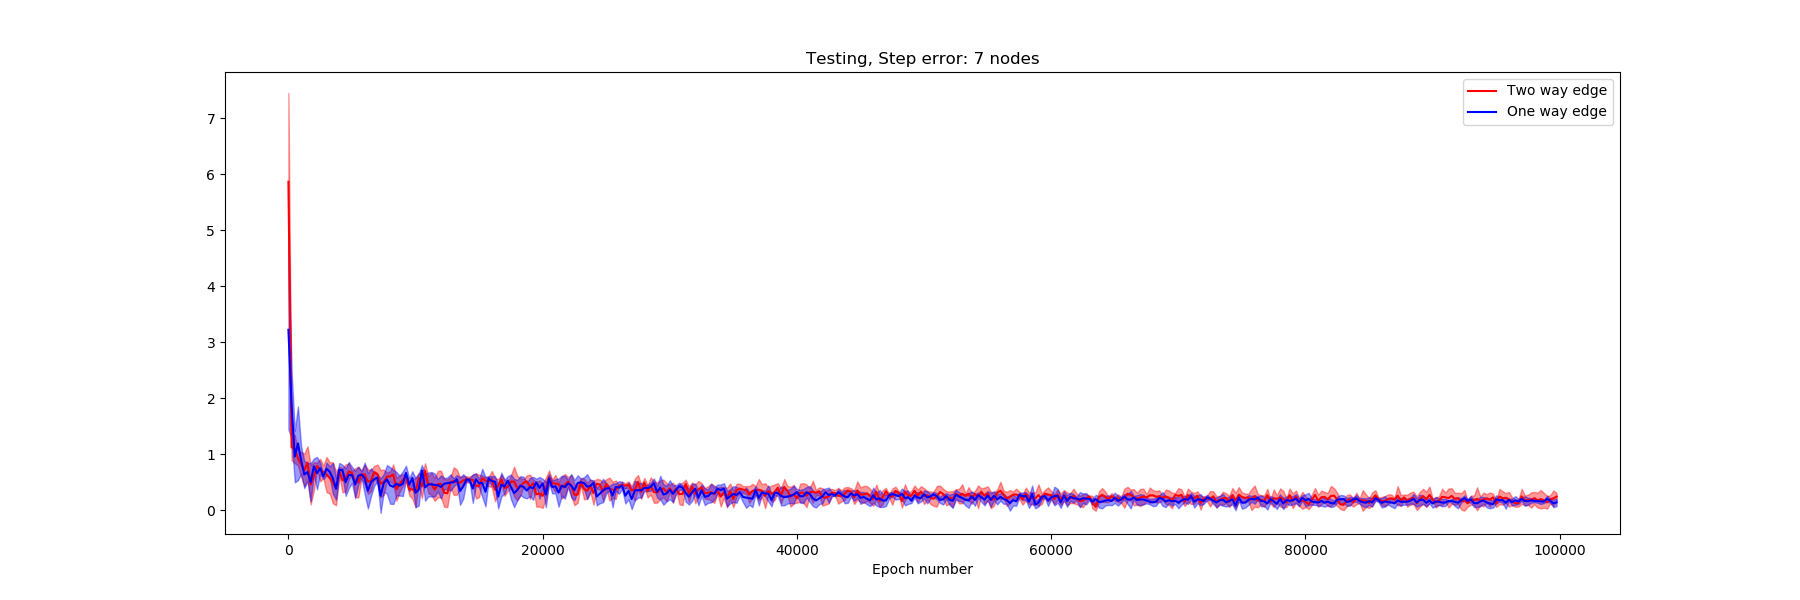

In [17]:
one_way_ge_mean = np.mean(one_way_te_7,axis = 0)
one_way_ge_std = np.std(one_way_te_7,axis = 0)
two_way_ge_mean = np.mean(two_way_te_7,axis = 0)
two_way_ge_std = np.std(two_way_te_7,axis = 0)

plt.close('all')
fig = plt.figure(1, figsize=(18, 6))
fig.clf()

ax = fig.add_subplot(1, 1, 1)
ax.plot(two_way_e_number[0], two_way_ge_mean, "r",label="Two way edge")
plt.fill_between(two_way_e_number[0], two_way_ge_mean-two_way_ge_std, two_way_ge_mean+two_way_ge_std, color = "r",alpha=0.4)
ax.plot(one_way_e_number[0], one_way_ge_mean, "b",label="One way edge")
plt.fill_between(one_way_e_number[0], one_way_ge_mean-one_way_ge_std, one_way_ge_mean+one_way_ge_std, color = "b",alpha=0.4)

ax.legend()
ax.set_title("Testing, Step error: 7 nodes")
ax.set_xlabel("Epoch number")
plt.show()

#Save figure                  
fig.savefig(os.path.join(save_path,"ConvergencePlots_avg_te_7.pdf"))

<IPython.core.display.Javascript object>


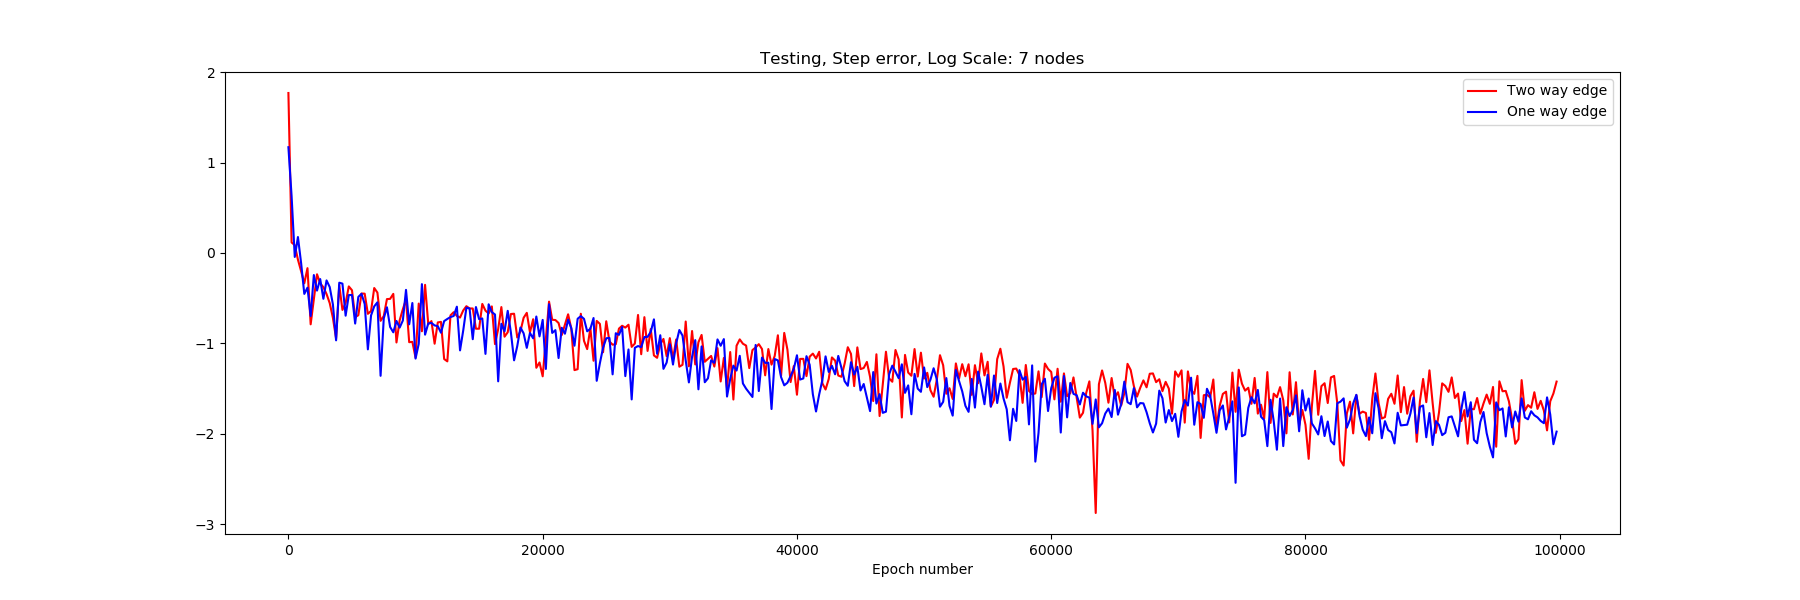

In [18]:
one_way_ge_mean = np.mean(one_way_te_7,axis = 0)
one_way_ge_std = np.std(one_way_te_7,axis = 0)
two_way_ge_mean = np.mean(two_way_te_7,axis = 0)
two_way_ge_std = np.std(two_way_te_7,axis = 0)

plt.close('all')
fig = plt.figure(1, figsize=(18, 6))
fig.clf()

ax = fig.add_subplot(1, 1, 1)
ax.plot(two_way_e_number[0], np.log(two_way_ge_mean), "r",label="Two way edge")
ax.plot(one_way_e_number[0], np.log(one_way_ge_mean), "b",label="One way edge")
ax.legend()
ax.set_title("Testing, Step error, Log Scale: 7 nodes")
ax.set_xlabel("Epoch number")
plt.show()

#Save figure                  
fig.savefig(os.path.join(save_path,"ConvergencePlots_avg_te_7_log_scale.pdf"))

<IPython.core.display.Javascript object>


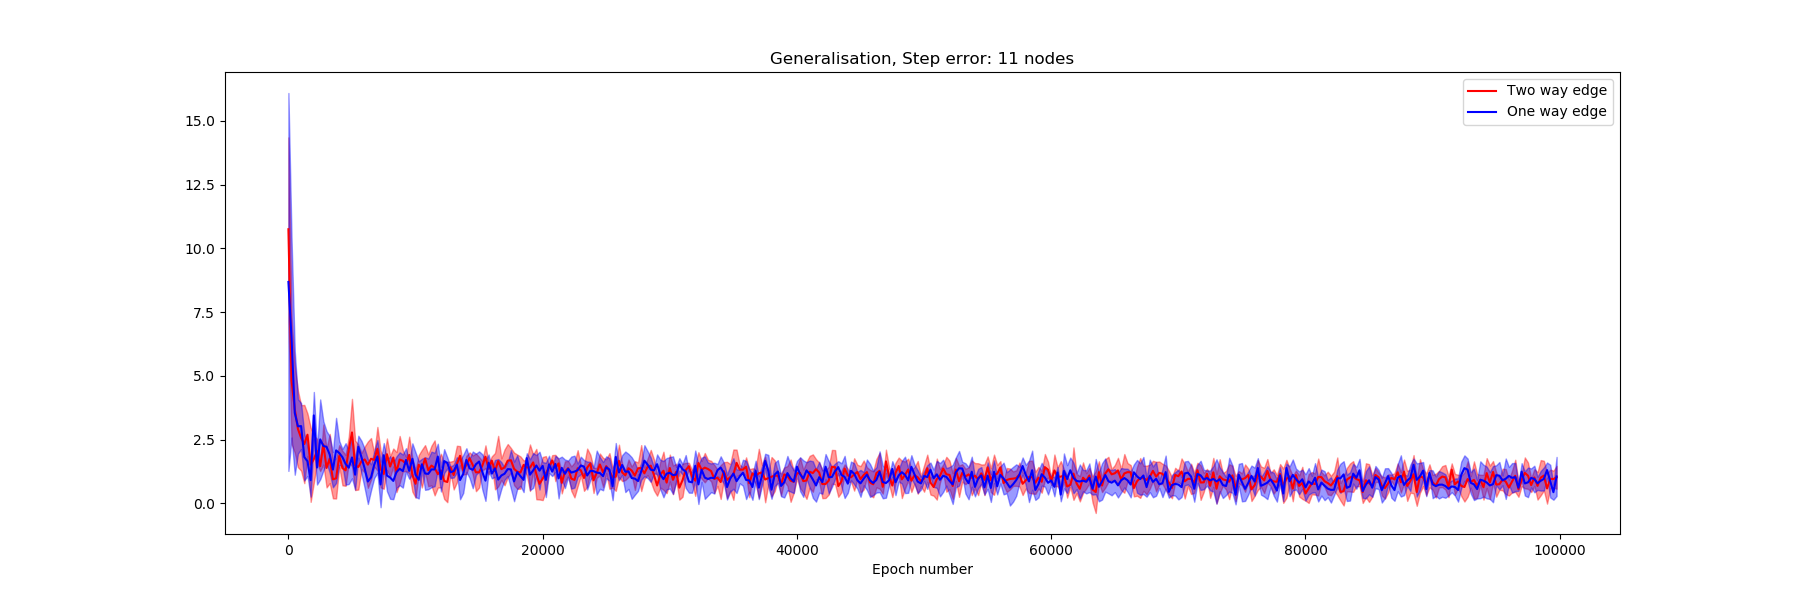

In [19]:
one_way_ge_mean = np.mean(one_way_ge_11,axis = 0)
one_way_ge_std = np.std(one_way_ge_11,axis = 0)
two_way_ge_mean = np.mean(two_way_ge_11,axis = 0)
two_way_ge_std = np.std(two_way_ge_11,axis = 0)

plt.close('all')
fig = plt.figure(1, figsize=(18, 6))
fig.clf()

ax = fig.add_subplot(1, 1, 1)
ax.plot(two_way_e_number[0], two_way_ge_mean, "r",label="Two way edge")
plt.fill_between(two_way_e_number[0], two_way_ge_mean-two_way_ge_std, two_way_ge_mean+two_way_ge_std, color = "r",alpha=0.4)
ax.plot(one_way_e_number[0], one_way_ge_mean, "b",label="One way edge")
plt.fill_between(one_way_e_number[0], one_way_ge_mean-one_way_ge_std, one_way_ge_mean+one_way_ge_std, color = "b",alpha=0.4)

ax.legend()
ax.set_title("Generalisation, Step error: 11 nodes")
ax.set_xlabel("Epoch number")
plt.show()

#Save figure                  
fig.savefig(os.path.join(save_path,"ConvergencePlots_avg_ge_11.pdf"))

<IPython.core.display.Javascript object>


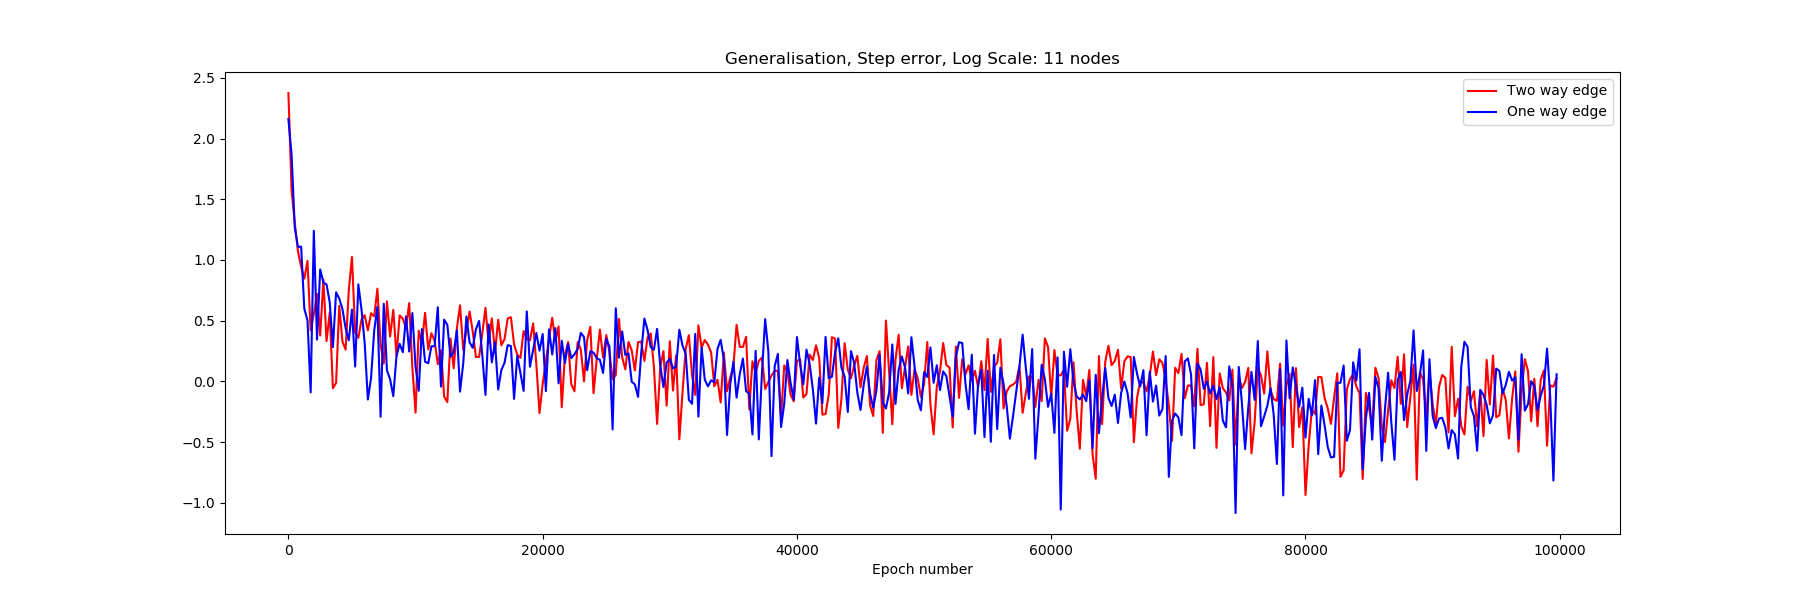

In [20]:
one_way_ge_mean = np.mean(one_way_ge_11,axis = 0)
one_way_ge_std = np.std(one_way_ge_11,axis = 0)
two_way_ge_mean = np.mean(two_way_ge_11,axis = 0)
two_way_ge_std = np.std(two_way_ge_11,axis = 0)

plt.close('all')
fig = plt.figure(1, figsize=(18, 6))
fig.clf()

ax = fig.add_subplot(1, 1, 1)
ax.plot(two_way_e_number[0], np.log(two_way_ge_mean), "r",label="Two way edge")
ax.plot(one_way_e_number[0], np.log(one_way_ge_mean), "b",label="One way edge")
ax.legend()
ax.set_title("Generalisation, Step error, Log Scale: 11 nodes")
ax.set_xlabel("Epoch number")
plt.show()

#Save figure                  
fig.savefig(os.path.join(save_path,"ConvergencePlots_avg_ge_11_log_scale.pdf"))